*1.importing required libraries*

In [8]:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


*2. Load the data file using pandas.*


In [9]:
#importing the dataset
df=pd.read_csv("Google_Plastore_cleaned data.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [11]:
df.shape

(10840, 16)

*3. Check for null values in the data. Get the number of null values for each column.*


In [15]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

*4.Handling records with nulls in any of the columns.*

In [23]:
#Imputing missing value in size and rating with mean
df["Size"]=df["Size"].fillna(df["Size"].mean())
df["Rating"]=df["Rating"].fillna(df["Rating"].mean())
df.isnull().sum().sort_values(ascending=False)

Current Ver       8
Android Ver       2
Type              1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Day               0
Month             0
Year              0
dtype: int64

In [24]:
#Drop records with nulls in Current Ver,Android Ver,Type,columns.
df.dropna(inplace= True)
df.isnull().sum()
df.shape


(10829, 16)

*Important Checks*

*1.Rating between 1 and 5*
* Average rating should be between 1 and 5 as only these values are allowed on the play store.
* Dropping the rows that have a value outside this range.

In [26]:
len(df[(df['Rating'] < 1) & (df['Rating'] > 5)])


0

In [27]:
df.shape

(10829, 16)

*2.Reviews and Installs*
* Reviews and Installs should not be more than installs as only those who installed can review the app.
* Dropping those Reviews more than Installs

In [28]:
len(df[df.Installs<df.Reviews])

11

In [36]:
#extracting index having more reviews
index_drop=list(df[df.Installs<df.Reviews].Installs.index)
index_drop

[]

In [37]:
# dropping more reviewed rows
df.drop(axis=0 ,index=index_drop, inplace=True)

In [39]:
df.isnull().sum().sort_values(ascending=False).sum()

0

*3.Price*
* For free apps (type = “Free”), the price should not be >0 Dropping any such rows.

In [43]:
len(df[(df["Type"]=="free" )& (df["Price"] !=0)])

0

**5.Performing univariate analysis.**

> Boxplot for Price.


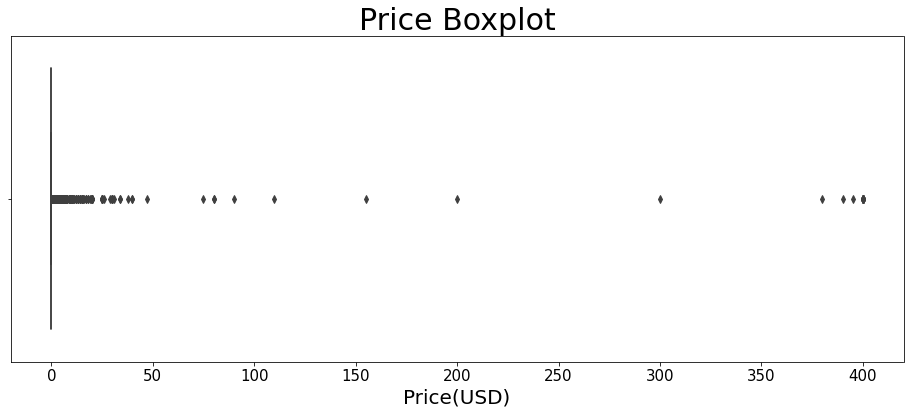

In [45]:
plt.figure(figsize=(16, 6))
b=sns.boxplot(df.Price)
b.axes.set_title("Price Boxplot",fontsize=30)
b.set_xlabel("Price(USD)",fontsize=20)
b.tick_params(labelsize=15)

> Boxplot for Price.

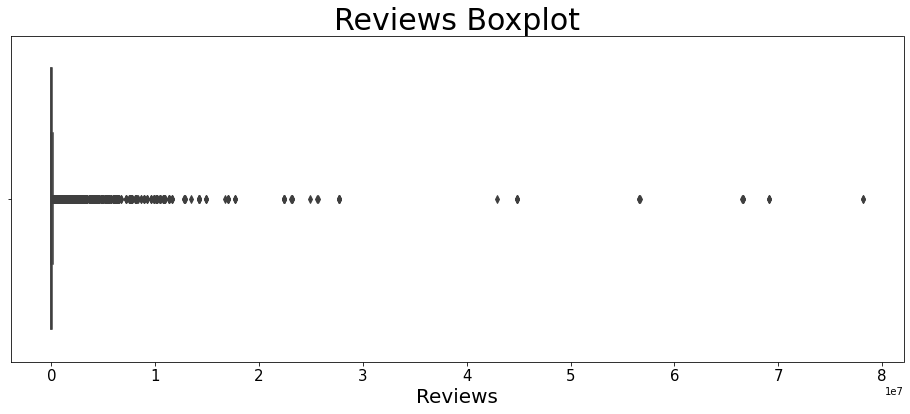

In [46]:
plt.figure(figsize=(16, 6))
b=sns.boxplot(df.Reviews)
b.axes.set_title("Reviews Boxplot",fontsize=30)
b.set_xlabel("Reviews",fontsize=20)
b.tick_params(labelsize=15)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10818 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10818 non-null  object 
 1   Category        10818 non-null  object 
 2   Rating          10818 non-null  float64
 3   Reviews         10818 non-null  int64  
 4   Size            10818 non-null  float64
 5   Installs        10818 non-null  int64  
 6   Type            10818 non-null  object 
 7   Price           10818 non-null  float64
 8   Content Rating  10818 non-null  object 
 9   Genres          10818 non-null  object 
 10  Last Updated    10818 non-null  object 
 11  Current Ver     10818 non-null  object 
 12  Android Ver     10818 non-null  object 
 13  Day             10818 non-null  int64  
 14  Month           10818 non-null  int64  
 15  Year            10818 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


>Histogram for Rating

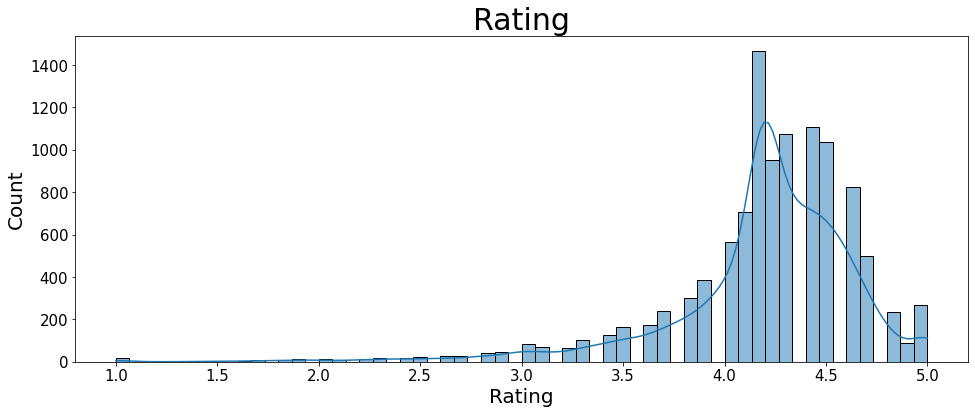

In [48]:
plt.figure(figsize=(16,6))
hist=sns.histplot(df.Rating,bins=60,kde=True)
hist.axes.set_title("Rating",fontsize=30)
hist.set_xlabel("Rating",fontsize=20)
hist.set_ylabel("Count",fontsize=20)
hist.tick_params(labelsize=15)

* The ratings are normally distributed but they are left skewed and are towards higher ratings

> Histogram for Size

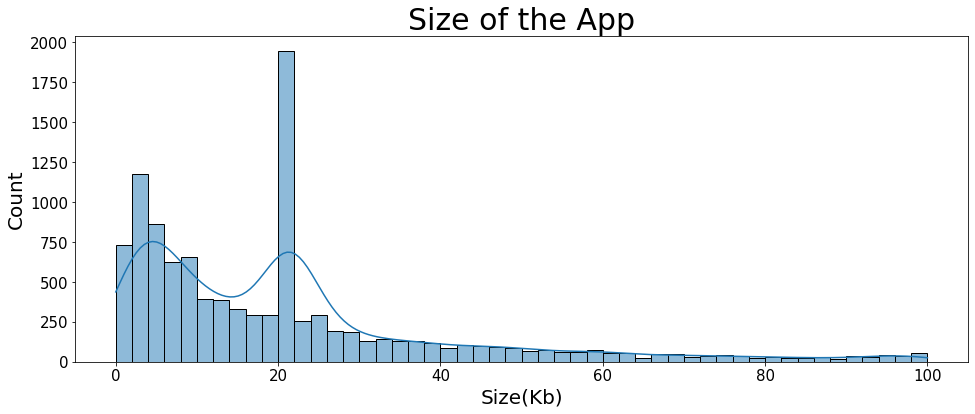

In [52]:
plt.figure(figsize=(16, 6))
hist=sns.histplot(df.Size,bins=50,kde=True)
hist.axes.set_title("Size of the App",fontsize=30)
hist.set_xlabel("Size(Kb)",fontsize=20)
hist.set_ylabel("Count",fontsize=20)
hist.tick_params(labelsize=15)

* There are outliers in all the above plots

**Outlier Treatment**

* From the above Price plot we can see that there are many apps which has price more than 200 USD, Thi is very high and suspicious

In [54]:
df.Price.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10    0.00
0.25    0.00
0.50    0.00
0.75    0.00
0.90    0.00
0.95    1.99
0.99    9.99
Name: Price, dtype: float64

In [55]:
len(df[df.Price >=200])

18

In [56]:
df.Price.mean()

1.0284026622296067

* The mean Price of all the apps is  1.0284,  200 is indeed very high price for a app.

In [63]:
price_drop=list(df[df.Price >=200].Price.index)
price_drop

[]

In [64]:
df.drop(axis=0 ,index=price_drop, inplace=True)

In [65]:
df.shape

(10800, 16)

**Reviews**

In [66]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [69]:
#Finding the IQR
percentile25 = df['Reviews'].quantile(0.25)
percentile75 = df['Reviews'].quantile(0.75)
IQR=percentile75-percentile25
IQR,percentile25,percentile75

(55291.75, 38.0, 55329.75)

In [68]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(138267.375, -82899.625)

In [71]:
# Outliers
df[df['Reviews'] > upper_limit]
df[df['Reviews'] < lower_limit]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39.000000,5000000,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,3,8,2018
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31.000000,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up,30,7,2018
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,21.506534,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,30,7,2018
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24.000000,10000000,Free,0.0,Everyone,Art & Design,2018-07-31,1.6.1,4.1 and up,31,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,PhotoFunia,PHOTOGRAPHY,4.3,316378,4.400000,10000000,Free,0.0,Everyone,Photography,2017-06-03,4.0.7.0,2.3 and up,3,6,2017
10780,Modern Strike Online,GAME,4.3,834117,44.000000,10000000,Free,0.0,Teen,Action,2018-07-30,1.25.4,4.1 and up,30,7,2018
10783,Big Hunter,GAME,4.3,245455,84.000000,10000000,Free,0.0,Everyone 10+,Action,2018-05-31,2.8.6,4.0 and up,31,5,2018
10808,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24.000000,1000000,Free,0.0,Everyone,Strategy,2018-07-18,1.4.2,4.1 and up,18,7,2018


In [72]:
#Capping(Winsorization)
df['Reviews'] = np.where(df['Reviews'] >= upper_limit,
        upper_limit,
        np.where(df['Reviews'] <= lower_limit,
        lower_limit,
        df['Reviews']))
df.shape

(10800, 16)

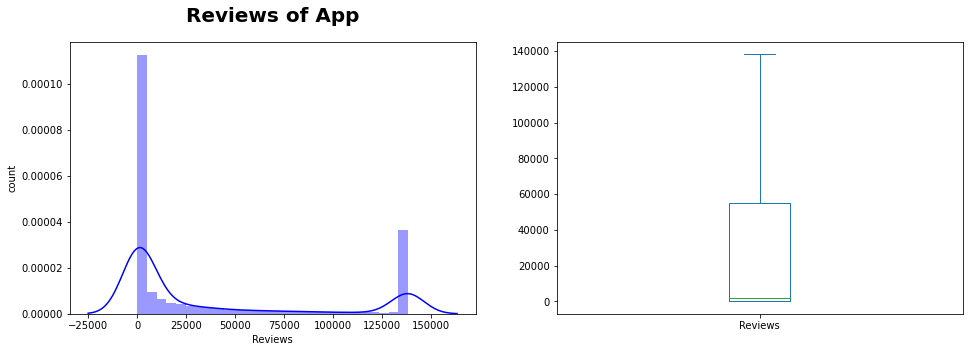

In [74]:
 #Compare the distribution and box-plot after capping

plt.figure(1)
plt.subplot(121)
sns.distplot("Reviews of App",x=df["Reviews"],color='b',kde=True)
plt.title("Reviews of App",weight='bold',fontsize=20,pad=20)
plt.xlabel("Reviews")
plt.ylabel("count")
plt.subplot(122)
df["Reviews"].plot.box(figsize=(16,5))
plt.show()

**3.Installs**


Many outliers are there. Apps having very high number of installs should be dropped from the analysis. Finding out the different percentiles – 10, 25, 50, 70, 90, 95, 99 Deciding a threshold as cutoff for outlier and drop records having values more than that

In [75]:
df.Installs.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10          100.0
0.25         5000.0
0.50       100000.0
0.75      5000000.0
0.90     10000000.0
0.95     50000000.0
0.99    500000000.0
Name: Installs, dtype: float64

* taking min threshold 5% and max threshold 95%

In [81]:
min_threshold,max_threshold=df.Installs.quantile([0.05,0.95])
high_install=list(df[(df.Installs>min_threshold) & (df.Installs<max_threshold)].Installs.index)
high_install

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 19

In [82]:
df.drop(axis=0 ,index=high_install, inplace=True)

In [83]:
df.shape

(1568, 16)

**Reviews and Install**
Reviews and Install have some values that are still relatively very high. Before building a linear regression model, we need to reduce the skew. Applying log transformation (np.log1p) to Reviews and Installs

In [91]:
df['Installs']= np.log1p(df['Installs'])
df['Reviews']= np.log1p(df['Reviews'])

In [92]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,11.836952,25.000000,17.727534,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,11.836952,21.506534,18.420681,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device,1,8,2018
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,11.836952,21.506534,18.420681,Free,0.0,Teen,Books & Reference,2018-07-27,Varies with device,Varies with device,27,7,2018
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,11.836952,21.506534,20.723266,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,3,8,2018
188,Indeed Job Search,BUSINESS,4.3,11.836952,21.506534,17.727534,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device,21,5,2018


**Dropping unwanted Columns**
Dropping columns App, Last Updated, Current Ver, Type and Android Ver. These variables are not useful for our task.

In [93]:
df.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis=1,inplace=True)

In [94]:
df.shape

(1568, 11)

**Dummy Columns**
Getting the dummy columns for Category, Genres, and Content Rating.Dummy encoding is one way to convert character fields to numeric. Name of dataframe is df_new.

In [95]:
cat_cols = ['Category', 'Content Rating','Genres']
df_new = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_new.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
3,4.5,11.836952,25.000000,17.727534,0.0,8,6,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
139,4.6,11.836952,21.506534,18.420681,0.0,1,8,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
143,4.2,11.836952,21.506534,18.420681,0.0,27,7,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
152,3.9,11.836952,21.506534,20.723266,0.0,3,8,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
188,4.3,11.836952,21.506534,17.727534,0.0,21,5,2018,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_new.shape

(1568, 101)

**Train test split and apply 70-30 split.
Name the new dataframes df_train and df_test**

In [97]:
df_train, df_test = train_test_split(df_new, train_size=0.70, random_state=0)
df_train.shape,df_test.shape

((1097, 101), (471, 101))

**Separate the dataframes into X_train, y_train, X_test, and y_test.**

In [98]:
#Separate the dataframes into X_train, y_train, X_test, and y_test.
y_train=df_train.Rating
X_train=df_train.drop(['Rating'],axis=1)
y_test=df_test.Rating
X_test=df_test.drop(['Rating'],axis=1)
X_train.shape,X_test.shape

((1097, 100), (471, 100))

**Model building**

In [99]:
reg =LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred= reg.predict(X_train)
print('\nR2 on train set: %.2f' % r2_score(y_train, y_pred).round(decimals=2))


R2 on train set: 0.13


**predictions on test set**

In [112]:
y_pred2=reg.predict(X_test)
r2=r2_score(y_test,y_pred2).round(decimals=2)


In [102]:
print('\nR2: %.2f' % r2)

print('\nMean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred2))

print("\nRoot Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred2)).round(decimals=2))


R2: 0.09

Mean Squared Error: 0.10

Root Mean Squared Error 0.32


In [103]:
reg_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2,'Difference':y_test-y_pred2})
reg_df

,Actual,Predicted,Difference
2447,4.191757,4.265390,-0.073632
7227,4.191757,4.196270,-0.004512
9056,5.000000,4.114692,0.885308
3693,4.600000,4.432621,0.167379
2847,4.600000,4.350754,0.249246
...,...,...,...
2433,4.191757,4.270490,-0.078733
225,3.800000,4.140935,-0.340935
7503,4.191757,4.446095,-0.254337
9910,4.191757,4.180644,0.011113


In [105]:
pip install mlxtend

In [107]:
from mlxtend.evaluate import bias_variance_decomp

In [108]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg, X_train.values,
                                                            y_train.values, X_test.values,
                                                            y_test.values,
                                                            loss='mse',
                                                            num_rounds=50,
                                                            random_seed=20)
 

In [109]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.107
Average bias: 0.101
Average variance: 0.006
